In [1]:
import pandas as pd
import numpy as np

In [2]:
from preprocessingHelper import PreprocessingHelper

In [3]:
df=pd.read_excel("online_retail_II-230817-120704.xlsx")

In [4]:
df.columns=[col.upper().replace(" ","_") for col in df.columns]

In [5]:
df["CUSTOMER_ID"]=df["CUSTOMER_ID"].astype('object')

In [6]:
pp=PreprocessingHelper(dataframe=df)

## Data Analysis

In [7]:
pp.checkDf()

##################### Shape #####################
(525461, 8)
##################### Describe #####################
             count       mean         std       min   25%  50%    75%  \
QUANTITY  525461.0  10.337667  107.424110  -9600.00  1.00  3.0  10.00   
PRICE     525461.0   4.688834  146.126914 -53594.36  1.25  2.1   4.21   

               max  
QUANTITY  19152.00  
PRICE     25111.09  
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   INVOICE      525461 non-null  object        
 1   STOCKCODE    525461 non-null  object        
 2   DESCRIPTION  522533 non-null  object        
 3   QUANTITY     525461 non-null  int64         
 4   INVOICEDATE  525461 non-null  datetime64[ns]
 5   PRICE        525461 non-null  float64       
 6   CUSTOMER_ID  417534 non-null  object  

In [8]:
df.loc[df["INVOICE"].apply(lambda x: len(str(x))>6)]

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [9]:
df.loc[df["QUANTITY"]<0]

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [10]:
df.loc[df["PRICE"]<0]

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
pp.missingValuesTable()

              Count     Ratio
DESCRIPTION    2928  0.005572
CUSTOMER_ID  107927  0.205395


In [12]:
df[(df["DESCRIPTION"]=="PAPER BUNTING WHITE LACE")&(df["QUANTITY"]<0)]

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
472282,C533899,22087,PAPER BUNTING WHITE LACE,-6,2010-11-19 11:50:00,2.95,13993.0,United Kingdom
501438,C536164,22087,PAPER BUNTING WHITE LACE,-65,2010-11-30 12:09:00,2.90,15369.0,United Kingdom


In [13]:
cat_cols,cat_but_car,num_cols=pp.grabColNames()

Observations = 525461

Variables = 8

catorical columns = 0

catorical but cardinal columns = 5

numerical columns = 3

numerical but categorical columns = 0



In [14]:
for col in cat_but_car:
    pp.catSummary(col_name=col)

         INVOICE     Ratio
537434       675  0.128459
538071       652  0.124082
537638       601  0.114376
537237       597  0.113615
536876       593  0.112853
...          ...       ...
523981         1  0.000190
523984         1  0.000190
523985         1  0.000190
C523988        1  0.000190
C516462        1  0.000190

[28816 rows x 2 columns]
##########################################
        STOCKCODE     Ratio
85123A       3516  0.669127
22423        2221  0.422676
85099B       2057  0.391466
21212        1933  0.367867
21232        1843  0.350740
...           ...       ...
90005B          1  0.000190
90197C          1  0.000190
90080           1  0.000190
20904           1  0.000190
21120           1  0.000190

[4632 rows x 2 columns]
##########################################
                                     DESCRIPTION     Ratio
WHITE HANGING HEART T-LIGHT HOLDER          3549  0.675407
REGENCY CAKESTAND 3 TIER                    2212  0.420964
STRAWBERRY CERAMIC TRINKET

             count       mean        std     min   5%  10%  20%  30%  40%  \
QUANTITY  525461.0  10.337667  107.42411 -9600.0  1.0  1.0  1.0  1.0  2.0   

          50%  60%  70%   80%   90%   95%    99%      max  
QUANTITY  3.0  5.0  8.0  12.0  24.0  30.0  120.0  19152.0  



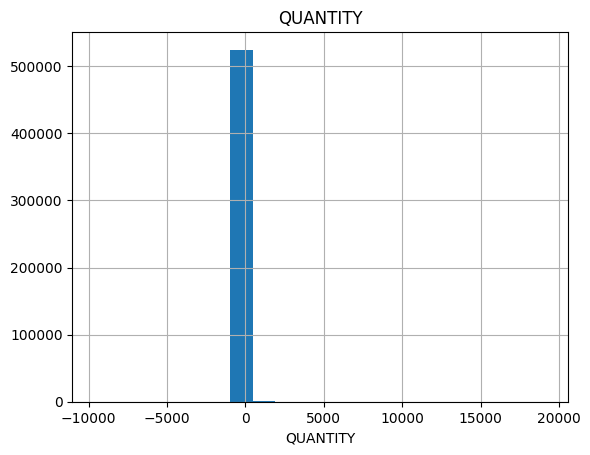

              count unique                 top freq               first  \
INVOICEDATE  525461  25296 2010-12-06 16:57:00  675 2009-12-01 07:45:00   

                           last  
INVOICEDATE 2010-12-09 20:01:00  



c:\Users\pc\Documents\GitHub\Miuul-Case\MachineLearning\homework3\preprocessingHelper.py:434: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(dataframe[[numerical_col]].describe(quantiles).T, end="\n\n")


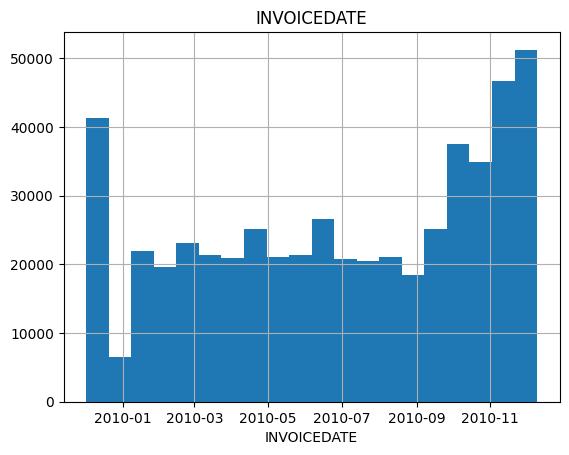

          count      mean         std       min    5%   10%   20%   30%   40%  \
PRICE  525461.0  4.688834  146.126914 -53594.36  0.42  0.65  1.25  1.28  1.66   

       50%   60%   70%   80%   90%    95%    99%       max  
PRICE  2.1  2.95  3.75  4.95  7.95  10.17  19.95  25111.09  



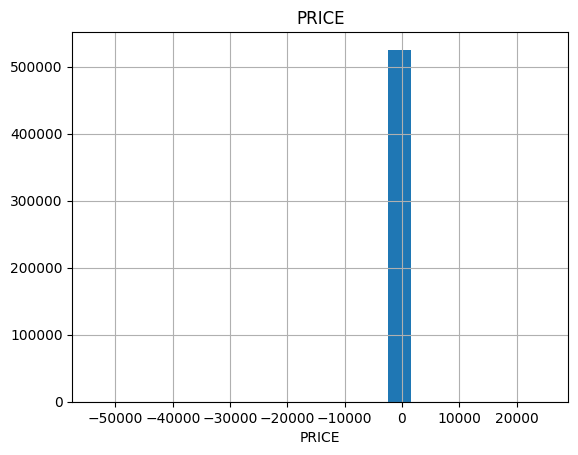

In [15]:
for col in num_cols:
    pp.numSummary(numerical_col=col,plot=True)

In [16]:
for col in num_cols:
    print(f"{col} {pp.checkOutlier(column_name=col,q1=0.05,q3=0.95)}")

QUANTITY True
INVOICEDATE False
PRICE True


## Feature Engineering

### Missing Values

In [17]:
df=df.drop(df.loc[df["PRICE"]<0].index)

In [18]:
df[df["CUSTOMER_ID"].isnull()]

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [19]:
df.drop(df[df["PRICE"]==0].index,inplace=True)

In [20]:
pp=PreprocessingHelper(dataframe=df)

In [21]:
df.loc[(df["CUSTOMER_ID"].isnull())].groupby(["INVOICE","COUNTRY"]).count()

,,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID
INVOICE,COUNTRY,,,,,,
489525,United Kingdom,2,2,2,2,2,0
489548,United Kingdom,55,55,55,55,55,0
489596,United Kingdom,1,1,1,1,1,0
489597,United Kingdom,502,502,502,502,502,0
489600,United Kingdom,31,31,31,31,31,0
...,...,...,...,...,...,...,...
C537630,United Kingdom,1,1,1,1,1,0
C537644,United Kingdom,1,1,1,1,1,0
C537647,United Kingdom,1,1,1,1,1,0


In [22]:
pp.missingValuesTable()

              Count     Ratio
CUSTOMER_ID  104268  0.199835


In [23]:
df.loc[(df["CUSTOMER_ID"].isnull()),"CUSTOMER_ID"]=df.loc[(df["CUSTOMER_ID"].isnull())].apply(
    lambda x: "N_"+str(x["INVOICE"])+"_"+"".join([col[0] if len(x["COUNTRY"].split())>=2 else col[0:2] for col in x["COUNTRY"].split()])
    ,axis=1)

In [24]:
pp.missingValuesTable()

Empty DataFrame
Columns: [Count, Ratio]
Index: []


In [25]:
df[(df["CUSTOMER_ID"].str.startswith("N",na=False))].head(10)

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,N_489525_UK,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,N_489525_UK,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,N_489548_UK,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,N_489548_UK,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,N_489548_UK,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,N_489548_UK,United Kingdom
1059,489548,22131,FOOD CONTAINER SET 3 LOVE HEART,2,2009-12-01 12:32:00,1.95,N_489548_UK,United Kingdom
1060,489548,22079,RIBBON REEL HEARTS DESIGN,10,2009-12-01 12:32:00,1.65,N_489548_UK,United Kingdom
1061,489548,22138,BAKING SET 9 PIECE RETROSPOT,3,2009-12-01 12:32:00,4.95,N_489548_UK,United Kingdom
1062,489548,22147,FELTCRAFT BUTTERFLY HEARTS,2,2009-12-01 12:32:00,1.45,N_489548_UK,United Kingdom


### Outlier

In [26]:
for col in num_cols:
    print(f"{col} {pp.checkOutlier(column_name=col,q1=0.01,q3=0.99)}")

QUANTITY True
INVOICEDATE False
PRICE True


In [27]:
df[(df["QUANTITY"]<0)&(df["INVOICE"].apply(lambda x: len(str(x))>6))].sort_values(by="QUANTITY")

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,2010-09-28 11:02:00,0.08,14277.0,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,2010-09-28 11:02:00,0.10,14277.0,France
...,...,...,...,...,...,...,...,...
180632,C506492,22361,GLASS JAR DAISY FRESH COTTON WOOL,-1,2010-04-30 10:52:00,2.95,15268.0,United Kingdom
180633,C506492,22364,GLASS JAR DIGESTIVE BISCUITS,-1,2010-04-30 10:52:00,2.95,15268.0,United Kingdom
180640,C506493,21217,RED SPOTTY ROUND CAKE TINS,-1,2010-04-30 10:52:00,9.95,17005.0,United Kingdom
180660,C506519,20712,JUMBO BAG WOODLAND ANIMALS,-1,2010-04-30 11:02:00,1.95,13461.0,United Kingdom


In [28]:
pp.replaceWithThresholds(column_name="PRICE",q1=0.01,q3=0.99)

In [30]:
pp.replaceWithThresholds(column_name="QUANTITY",q1=0.01,q3=0.99)

In [31]:
for col in num_cols:
    print(f"{col} {pp.checkOutlier(column_name=col,q1=0.01,q3=0.99)}")

QUANTITY False
INVOICEDATE False
PRICE False


In [35]:
df.loc[(df["QUANTITY"]<0)&(df["INVOICE"].apply(lambda x: len(str(x))>6)),"QUANTITY"]=df.loc[(df["QUANTITY"]<0)&(df["INVOICE"].apply(lambda x: len(str(x))>6)),"QUANTITY"]*(-1)

### RFM metrics

In [42]:
invalid_codes = df[df["STOCKCODE"].astype (str).str.contains (r"[a-zA-Z]{3,}")]["STOCKCODE"].unique ().tolist ()
invalid_codes

['POST',
 'DCGS0058',
 'DCGS0068',
 'DOT',
 'DCGS0004',
 'DCGS0076',
 'BANK CHARGES',
 'DCGS0003',
 'TEST001',
 'DCGS0072',
 'gift_0001_80',
 'gift_0001_20',
 'DCGS0044',
 'TEST002',
 'gift_0001_10',
 'gift_0001_50',
 'DCGS0066N',
 'gift_0001_30',
 'PADS',
 'ADJUST',
 'DCGS0069',
 'DCGS0070',
 'DCGS0075',
 'DCGS0041',
 'gift_0001_70',
 'DCGS0037',
 'DCGSSBOY',
 'DCGSSGIRL',
 'ADJUST2',
 'gift_0001_40',
 'DCGS0062',
 'AMAZONFEE']

In [44]:
df[df["STOCKCODE"].isin (invalid_codes)].groupby (["STOCKCODE"]).agg ({"INVOICE": "nunique",
                                                                       "QUANTITY": "sum",
                                                                       "PRICE": "sum",
                                                                       "CUSTOMER_ID": "nunique"})

,INVOICE,QUANTITY,PRICE,CUSTOMER_ID
STOCKCODE,,,,
ADJUST,67,67,2331.880,59
ADJUST2,3,3,148.320,3
AMAZONFEE,9,9,396.520,9
BANK CHARGES,61,75,2025.080,50
DCGS0003,9,9,22.650,9
DCGS0004,3,3,51.310,3
DCGS0037,1,1,12.720,1
DCGS0041,1,1,5.060,1
DCGS0044,1,1,2.570,1


In [45]:
df = df[~df["STOCKCODE"].isin (invalid_codes)].reset_index (drop=True)

In [47]:
df["TOTALPRICE"] = df["QUANTITY"] * df["PRICE"]

In [50]:
import datetime as dt

In [51]:
max_invoice_date = df["INVOICEDATE"].max ()
today_date = (max_invoice_date + dt.timedelta (days=2))

In [54]:
rfm_df=df.groupby("CUSTOMER_ID").agg({
    "INVOICEDATE": lambda date:(today_date - date.max()).days,
    "INVOICE": "nunique",
    "TOTALPRICE": "sum"})

In [55]:
rfm_df.head()

,INVOICEDATE,INVOICE,TOTALPRICE
CUSTOMER_ID,,,
12346.0,68,4,406.03
12347.0,4,2,1323.32
12348.0,75,1,221.16
12349.0,44,3,2245.29
12351.0,12,1,300.93


In [56]:
rfm_df.columns = ["Recency", "Frequency", "Monetary"]

In [59]:
pp.dataframe=rfm_df

In [61]:
for col in rfm_df.columns:
    print(f"{col} {pp.checkOutlier(column_name=col,q1=0.01,q3=0.99)}")

Recency False
Frequency True
Monetary True


In [62]:
for col in rfm_df.columns:
    pp.replaceWithThresholds(column_name=col,q1=0.01,q3=0.99)

In [66]:
rfm_df.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Recency,6246.0,117.984630,108.826477,2.00,2.0000,10.00,26.00,74.000,199.000,292.00,372.0000,375.000
Frequency,6246.0,3.919949,6.638561,1.00,1.0000,1.00,1.00,1.000,4.000,9.00,30.5500,74.875
Monetary,6246.0,1383.377872,3198.604510,0.19,2.1225,20.29,143.19,470.445,1409.815,3111.84,14942.0055,37351.830


          count       mean         std  min   5%   10%   20%   30%   40%  \
Recency  6246.0  117.98463  108.826477  2.0  4.0  10.0  19.0  33.0  54.0   

          50%    60%    70%    80%    90%     95%    99%    max  
Recency  74.0  114.0  170.0  228.0  292.0  338.75  372.0  375.0  



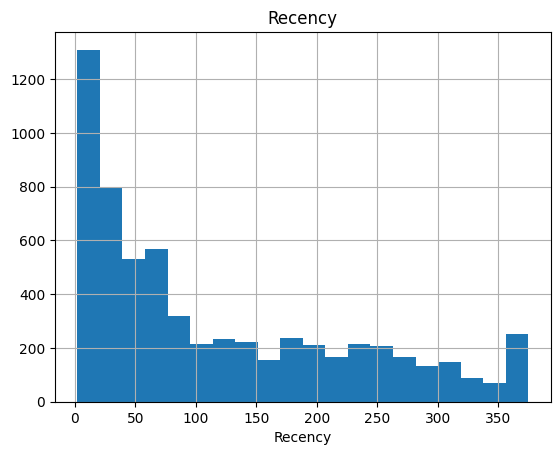

            count      mean       std  min   5%  10%  20%  30%  40%  50%  60%  \
Frequency  6246.0  3.919949  6.638561  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0   

           70%  80%  90%   95%    99%     max  
Frequency  3.0  5.0  9.0  14.0  30.55  74.875  



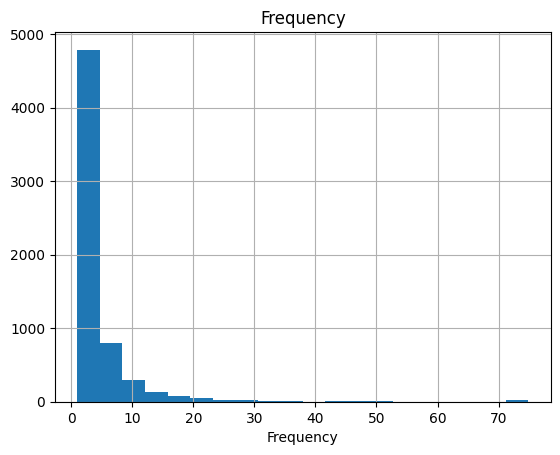

           count         mean         std   min    5%    10%   20%    30%  \
Monetary  6246.0  1383.377872  3198.60451  0.19  7.95  20.29  91.8  195.0   

             40%      50%     60%      70%      80%      90%      95%  \
Monetary  312.05  470.445  741.69  1158.91  1737.25  3111.84  5015.14   

                 99%       max  
Monetary  14942.0055  37351.83  



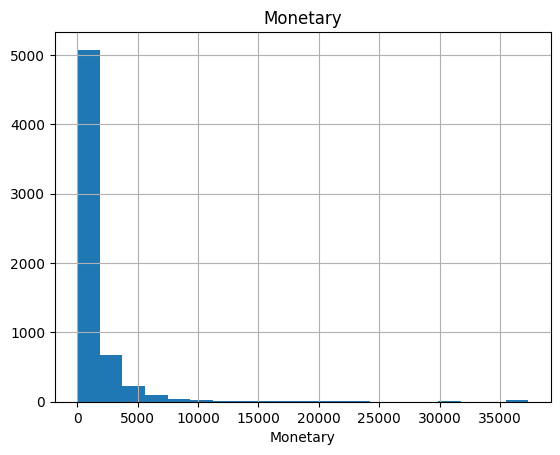

In [70]:
for col in rfm_df.columns:
    pp.numSummary(numerical_col=col,plot=True)

In [71]:
for col in ["Recency", "Frequency"]:
    rfm_df[f"LOG_{col}"]=np.log1p(rfm_df[col])

              count      mean       std       min        5%       10%  \
LOG_Recency  6246.0  4.178189  1.270157  1.098612  1.609438  2.397895   

                  20%       30%       40%       50%       60%       70%  \
LOG_Recency  2.995732  3.526361  4.007333  4.317488  4.744932  5.141664   

                  80%       90%       95%       99%       max  
LOG_Recency  5.433722  5.680173  5.828209  5.921578  5.929589  



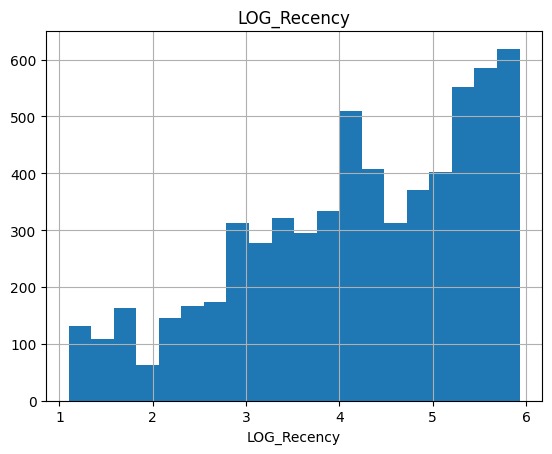

                count      mean       std       min        5%       10%  \
LOG_Frequency  6246.0  1.240196  0.717361  0.693147  0.693147  0.693147   

                    20%       30%       40%       50%       60%       70%  \
LOG_Frequency  0.693147  0.693147  0.693147  0.693147  1.098612  1.386294   

                    80%       90%      95%       99%       max  
LOG_Frequency  1.791759  2.302585  2.70805  3.451449  4.329087  



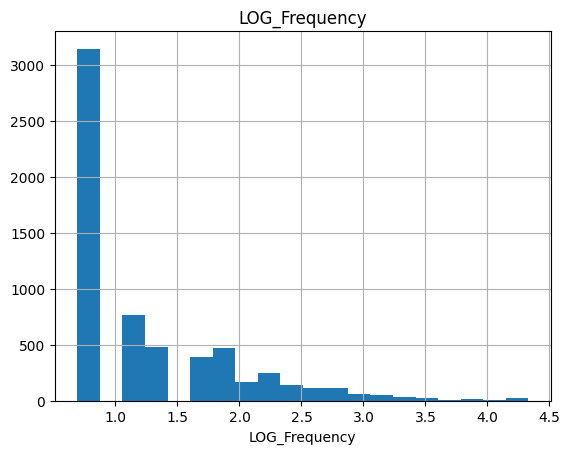

In [73]:
for col in ["LOG_Recency", "LOG_Frequency"]:
    pp.numSummary(numerical_col=col,plot=True)

# Training

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
sc=MinMaxScaler((0,1))

In [76]:
for col in ["LOG_Recency", "LOG_Frequency"]:
    rfm_df[col]=sc.fit_transform(rfm_df[[col]])

In [77]:
rfm_df.head()

,Recency,Frequency,Monetary,LOG_Recency,LOG_Frequency
CUSTOMER_ID,,,,,
12346.0,68,4.0,406.03,0.649039,0.252009
12347.0,4,2.0,1323.32,0.105740,0.111516
12348.0,75,1.0,221.16,0.669041,0.000000
12349.0,44,3.0,2245.29,0.560560,0.190638
12351.0,12,1.0,300.93,0.303528,0.000000


In [81]:
scaled_df=pd.DataFrame(index=rfm_df.index, columns=["LOG_Recency", "LOG_Frequency"], data=rfm_df)

In [82]:
from sklearn.cluster import KMeans

In [83]:
ssd=[]
for k in range(1,30):
    kmeans=KMeans(n_clusters=k,n_init="auto").fit(scaled_df)
    ssd.append(kmeans.inertia_)

In [100]:
from matplotlib import pyplot as plt
import seaborn as sns

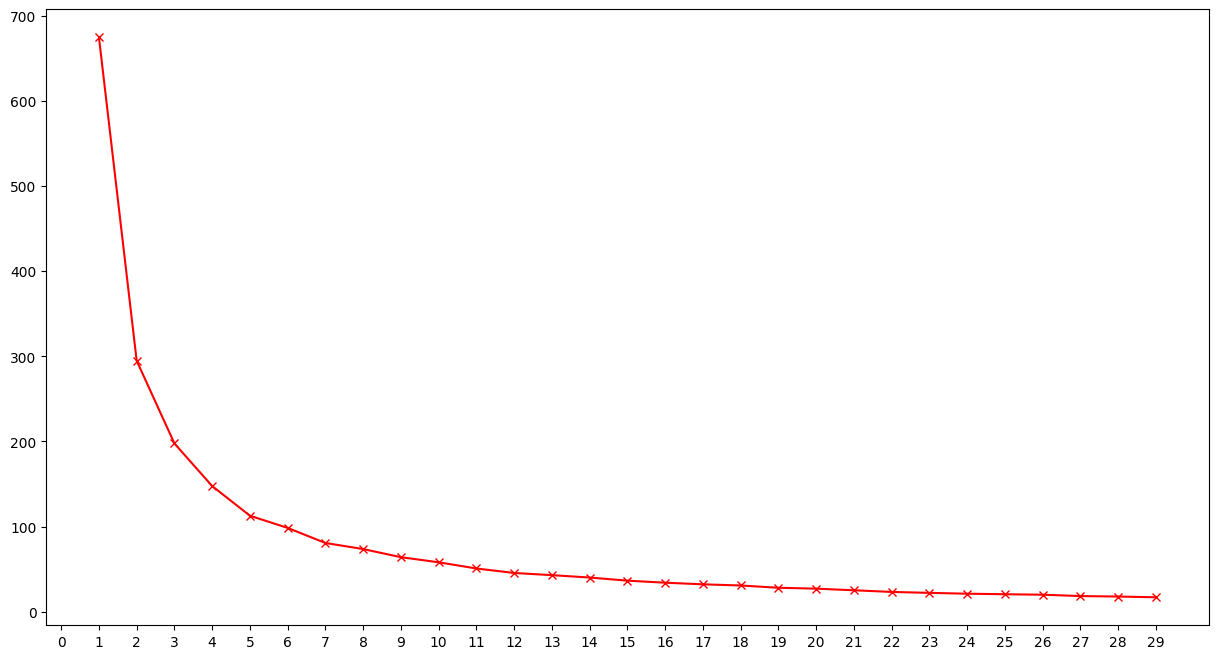

In [85]:
plt.figure(figsize=(15,8))
plt.xticks(range(0,30,1))
plt.plot(range(1,30),ssd,"rx-")
plt.show()

In [88]:
from sklearn.metrics import silhouette_score
silhouettes = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters = k,n_init="auto").fit(scaled_df)
    labels = kmeans.labels_
    silhouettes.append(silhouette_score(scaled_df, labels, metric = 'euclidean'))

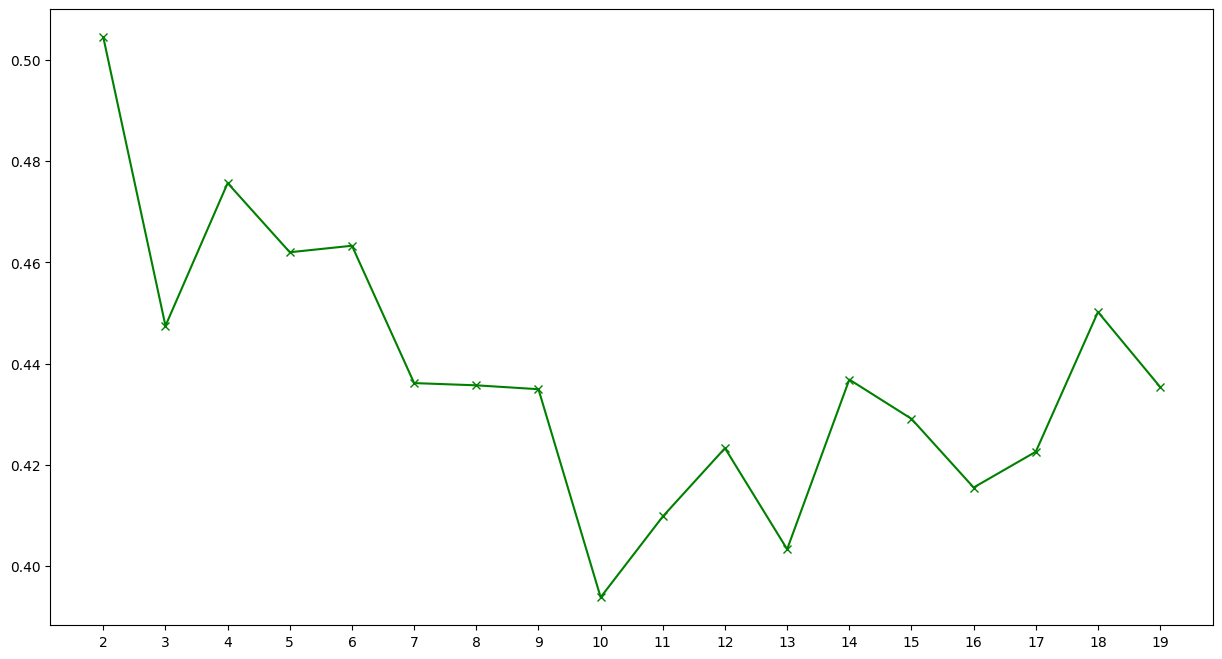

In [90]:
plt.figure(figsize=(15,8))
plt.xticks(range(2,21,1))
plt.plot(range(2,20),silhouettes,"gx-")
plt.show()

In [91]:
model=KMeans(n_clusters=5,n_init="auto")

In [92]:
model.fit(scaled_df)
labels = model.predict(scaled_df)

In [93]:
rfm_df["CLUSTER_LABEL"] = labels

In [94]:
rfm_df.head()

,Recency,Frequency,Monetary,LOG_Recency,LOG_Frequency,CLUSTER_LABEL
CUSTOMER_ID,,,,,,
12346.0,68,4.0,406.03,0.649039,0.252009,2
12347.0,4,2.0,1323.32,0.105740,0.111516,4
12348.0,75,1.0,221.16,0.669041,0.000000,0
12349.0,44,3.0,2245.29,0.560560,0.190638,2
12351.0,12,1.0,300.93,0.303528,0.000000,4


In [98]:
rfm_df.groupby("CLUSTER_LABEL").agg({
    "Recency": ["mean", "median", "count"],
    "Frequency": ["mean", "median", "count"],
    "Monetary": ["mean", "median", "count"]})

Recency               Frequency                  Monetary  \
                     mean median count       mean median count         mean   
CLUSTER_LABEL                                                                 
0               63.695447   61.0  1274   1.264521    1.0  1274   557.345644   
1               10.490591    9.0   744  15.364247   11.0   744  5498.776976   
2               72.119565   60.0  1104   6.009058    5.0  1104  1880.868542   
3              240.507127  234.0  2315   1.255292    1.0  2315   451.962242   
4               14.320148   15.0   809   2.351051    2.0   809   885.856996   

                               
                 median count  
CLUSTER_LABEL                  
0               269.335  1274  
1              2967.520   744  
2              1326.700  1104  
3               170.050  2315  
4               557.040   809

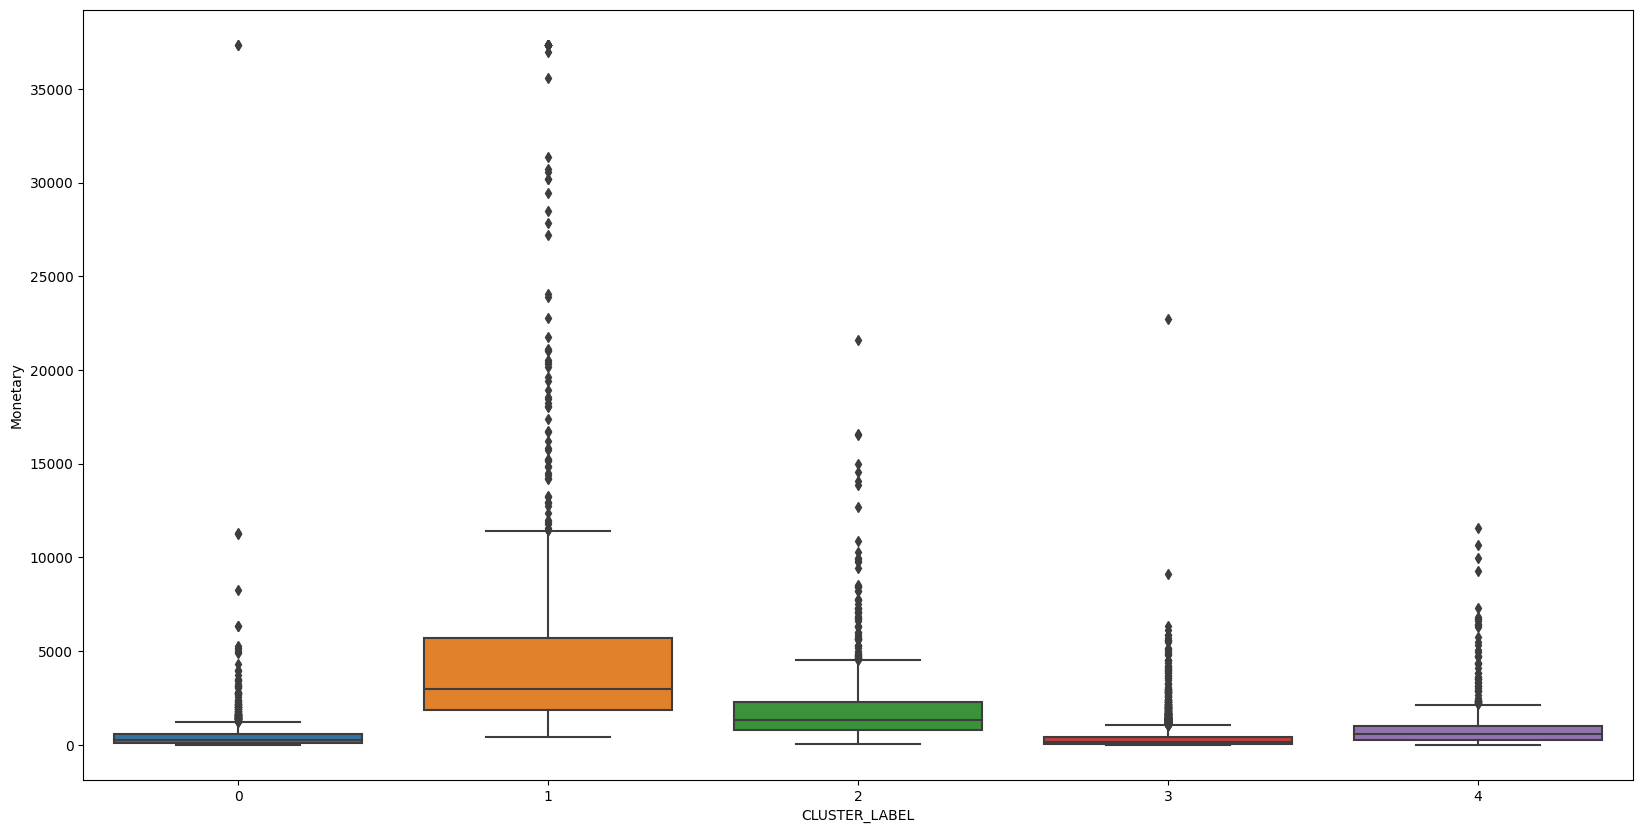

In [101]:
plt.figure (figsize=(20, 10))
sns.boxplot (x="CLUSTER_LABEL", y="Monetary", data=rfm_df)
plt.show ()